In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prof_salaries = pd.read_csv('/home/case/Desktop/CMSC320/Final/yearly_prof_salaries.csv')
prof_salaries = prof_salaries.dropna()
prof_salaries['year'] = prof_salaries['year'].astype(int)

In [3]:
economic_data = pd.read_csv('/home/case/Desktop/CMSC320/Final/productivity.csv')

In [4]:
productivity = economic_data.loc[(economic_data['LOCATION'] == 'USA') & (economic_data['SUBJECT'] == 'T_GDPEMP') & (economic_data['MEASURE'] == 'C')]

In [5]:
drops = [col for col in productivity.columns if col not in ['TIME', 'Value']]
productivity = productivity.drop(drops, axis=1)
productivity.columns = ['year', 'productivity']
productivity.head()

,year,productivity
22884,1970,12954.304612
22885,1971,14005.314288
22886,1972,14949.335577
22887,1973,16132.192494
22888,1974,17170.129784


In [6]:
prof_salaries.index = prof_salaries['year']
productivity_wages = productivity.join(prof_salaries, on='year', lsuffix='_prod', how='inner')

In [7]:
yearly_wages = pd.read_csv('/home/case/Desktop/CMSC320/Final/average_annual_wages.csv')
yearly_wages.columns = ['year', 'average_wage']
yearly_wages.index = yearly_wages['year']
productivity_wages.head()

,year_prod,productivity,year,total,professor,associate professor,assistant professor,instructor,lecturer,no rank,total_public,4_year_public,2_year_public,total_private,4_year_private,2_year_private
22884,1970,12954.304612,1970,"12,710","17,958","13,563","11,176","9,360","11,196","12,333","12,953","13,121","12,644","11,619","11,824","8,664"
22885,1971,14005.314288,1971,"12,710","17,958","13,563","11,176","9,360","11,196","12,333","12,953","13,121","12,644","11,619","11,824","8,664"
22889,1975,18941.295501,1975,16659,22649,17065,13986,13672,12906,15196,16942,17400,15820,15921,16116,10901
22890,1976,20419.327062,1976,16659,22649,17065,13986,13672,12906,15196,16942,17400,15820,15921,16116,10901
22891,1977,21924.574004,1977,16659,22649,17065,13986,13672,12906,15196,16942,17400,15820,15921,16116,10901


In [8]:
productivity_wages = productivity_wages.join(yearly_wages, on='year', rsuffix='_wages', how='inner')
ops = [col for col in productivity_wages.columns if not col == 'productivity']
for column in ops:
    productivity_wages[column] = productivity_wages[column].astype(float)
    productivity_wages[column] = productivity_wages[column].astype(int)
productivity_wages.dtypes

year_prod                int64
productivity           float64
year                     int64
total                    int64
professor                int64
associate professor      int64
assistant professor      int64
instructor               int64
lecturer                 int64
no rank                  int64
total_public             int64
4_year_public            int64
2_year_public            int64
total_private            int64
4_year_private           int64
2_year_private           int64
year_wages               int64
average_wage             int64
dtype: object

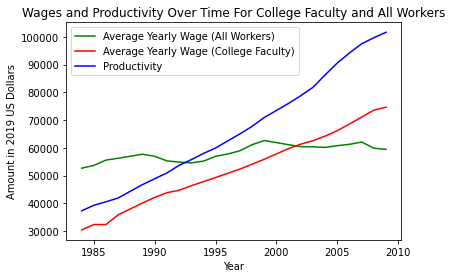

In [9]:

plt.plot(productivity_wages['year'], productivity_wages['average_wage'], color='green', label='Average Yearly Wage (All Workers)')
plt.plot(productivity_wages['year'], productivity_wages['total'], color='red', label='Average Yearly Wage (College Faculty)')
plt.plot(productivity_wages['year'], productivity_wages['productivity'], color='blue', label='Productivity')
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Amount in 2019 US Dollars")
plt.title("Wages and Productivity Over Time For College Faculty and All Workers")
plt.show()

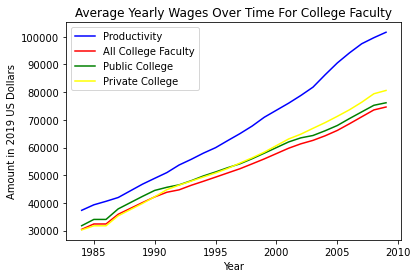

In [10]:
plt.plot(productivity_wages['year'], productivity_wages['productivity'], color='blue', label='Productivity')
plt.plot(productivity_wages['year'], productivity_wages['total'], color='red', label='All College Faculty')
plt.plot(productivity_wages['year'], productivity_wages['4_year_public'], color='green', label='Public College')
plt.plot(productivity_wages['year'], productivity_wages['4_year_private'], color='yellow', label='Private College')
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Amount in 2019 US Dollars")
plt.title("Average Yearly Wages Over Time For College Faculty")
plt.show()

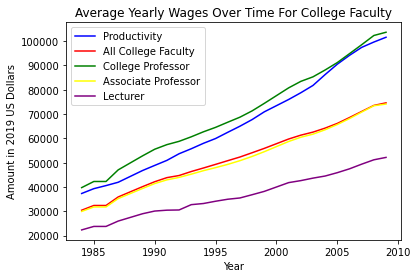

In [11]:
plt.plot(productivity_wages['year'], productivity_wages['productivity'], color='blue', label='Productivity')
plt.plot(productivity_wages['year'], productivity_wages['total'], color='red', label='All College Faculty')
plt.plot(productivity_wages['year'], productivity_wages['professor'], color='green', label='College Professor')
plt.plot(productivity_wages['year'], productivity_wages['associate professor'], color='yellow', label='Associate Professor')
plt.plot(productivity_wages['year'], productivity_wages['lecturer'], color='purple', label='Lecturer')
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Amount in 2019 US Dollars")
plt.title("Average Yearly Wages Over Time For College Faculty")
plt.show()

In [34]:
yearly_enrolled = pd.read_csv('/home/case/Desktop/CMSC320/Final/yearly_enrollment.csv')
yearly_enrolled['total'] = yearly_enrolled['public'] + yearly_enrolled['private']
yearly_enrolled.tail()

,year,public,private,total
32,1988,10.16,2.89,13.05
33,1987,9.97,2.79,12.76
34,1986,9.71,2.79,12.50
35,1985,9.48,2.77,12.25
36,1984,9.48,2.76,12.24


In [18]:
first = pd.read_csv("/home/case/Desktop/CMSC320/Final/delta_public_release_87_99.csv", error_bad_lines=False)
second = pd.read_csv("/home/case/Desktop/CMSC320/Final/delta_public_release_00_15.csv", error_bad_lines=False)
first.head()

,groupid,academicyear,unitid_linchpin,unitid,isgrouped,instname,tcsname,city,state,zip,...,ifaculty_instr_headcount,isalarytotal,isalarytotal_fteap1b,isalarytotal_fteap3,isalarytotal_fteap4,isalarytotal_fteap5a,isalarytotal_fteap5b,isalarytotal_fteap5c,isalarytotal_fteap6,isalarytotal_fteap7_8
0,-434973,1999,434973,434973,0,University of Phoenix-Maryland Campus,NaN,Columbia,MD,21045-542,...,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-434937,1999,434937,434937,0,Yeshiva College of the Nations Capital,NaN,Silver Spring,MD,20902,...,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-434928,1999,434928,434928,0,University of Northern Virginia,NaN,Manassas,VA,20109,...,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-434919,1999,434919,434919,0,PONCE JUNIOR COLLEGE,NaN,PONCE,PR,731,...,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-434876,1999,434876,434876,0,CENTER FOR EMPLOYMENT TRAINING-TRACY CAMPUS,NaN,TRACY,CA,95376,...,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
combined = first.append(second)

158161

In [23]:
combined.head()

,groupid,academicyear,unitid_linchpin,unitid,isgrouped,instname,tcsname,city,state,zip,...,isalarytotal,isalarytotal_fteap1b,isalarytotal_fteap3,isalarytotal_fteap4,isalarytotal_fteap5a,isalarytotal_fteap5b,isalarytotal_fteap5c,isalarytotal_fteap6,isalarytotal_fteap7_8,Unnamed: 672
0,-434973,1999,434973,434973,0,University of Phoenix-Maryland Campus,NaN,Columbia,MD,21045-542,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-434937,1999,434937,434937,0,Yeshiva College of the Nations Capital,NaN,Silver Spring,MD,20902,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-434928,1999,434928,434928,0,University of Northern Virginia,NaN,Manassas,VA,20109,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-434919,1999,434919,434919,0,PONCE JUNIOR COLLEGE,NaN,PONCE,PR,731,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-434876,1999,434876,434876,0,CENTER FOR EMPLOYMENT TRAINING-TRACY CAMPUS,NaN,TRACY,CA,95376,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
year_totals = {}
copy = combined.loc[(combined['academicyear'] == 2000) | (combined['academicyear'] == 2001) | (combined['academicyear'] == 2002)]
na_counts = {}
for year in range(1987, 2016):
    year_salaries = combined.loc[combined['academicyear'] == year]['instruction02']
    na_counts[year] = year_salaries.isnull().sum()
    year_salaries.fillna(value=year_salaries.mean(), inplace=True)
    year_totals[year] = year_salaries.sum()

In [48]:
year_totals_df = pd.DataFrame(pd.Series(year_totals))
totals_and_enrollment = yearly_enrolled.join(year_totals_df, on="year", how="inner")

In [49]:
totals_and_enrollment.columns = ['year', 'public', 'private', 'total', 'faculty_spending']
totals_and_enrollment['per_capita'] = totals_and_enrollment['faculty_spending'] / totals_and_enrollment['total']
totals_and_enrollment['per_capita'].head()

5    5.050965e+09
6    4.845920e+09
7    6.179506e+09
8    5.877738e+09
9    5.567178e+09
Name: per_capita, dtype: float64

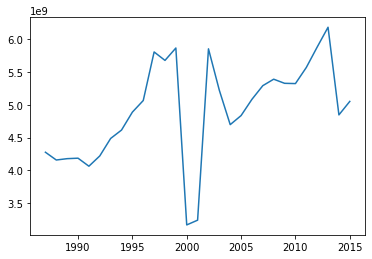

In [50]:
plt.plot(totals_and_enrollment['year'], totals_and_enrollment['per_capita'])
plt.show()

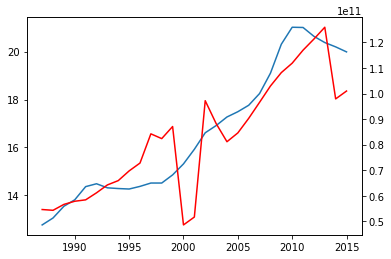

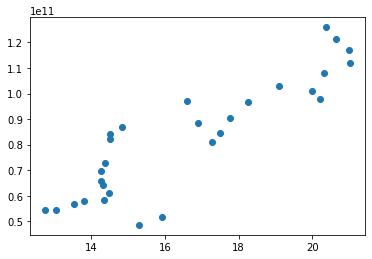

In [75]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(totals_and_enrollment['year'], totals_and_enrollment['total'])
ax2.plot(totals_and_enrollment['year'], totals_and_enrollment['faculty_spending'], color='red')
plt.show()
plt.scatter(totals_and_enrollment['total'], totals_and_enrollment['faculty_spending'])

In [73]:
from statsmodels.regression.linear_model import OLS

def normalize(df, col):
    vals = df[col].values
    normalized = (vals - vals.mean()) / vals.std()
    return normalized

normalized_spending = normalize(totals_and_enrollment, 'faculty_spending')
normalized_total = normalize(totals_and_enrollment, 'total')

reg = OLS(normalized_total, normalized_spending)
results = reg.fit(method='pinv')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              103.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                    6.57e-11
Time:                        07:52:19   Log-Likelihood:                         -18.719
No. Observations:                  29   AIC:                                      39.44
Df Residuals:                      28   BIC:                                      40.81
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8872      0.087     10.174      0.000       0.709       1.066
==============================================================================
Omnibus:                        0.085   Durbin-Watson:                   1.206
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.223
Skew:                           0.112   Prob(JB):                        0.894
Kurtosis:                       2.633   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
average_tuition = pd.read_csv("/home/case/Desktop/CMSC320/Final/average_tuition.csv")
average_tuition.index = average_tuition['year']
average_tuition.head()

,year,average_tuition
year,,
1987,1987,139.385
1988,1988,150.000
1989,1989,161.900
1990,1990,174.969
1991,1991,192.785


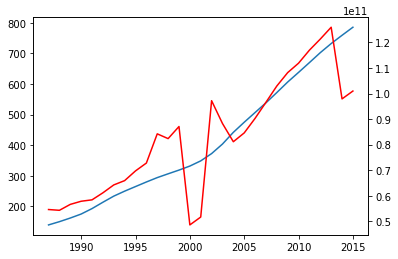

In [85]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(average_tuition['year'], average_tuition['average_tuition'])
ax2.plot(totals_and_enrollment['year'], totals_and_enrollment['faculty_spending'], color='red')

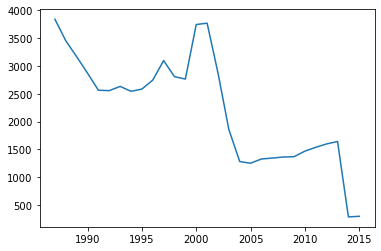

In [96]:
plt.plot(na_counts.keys(), na_counts.values())

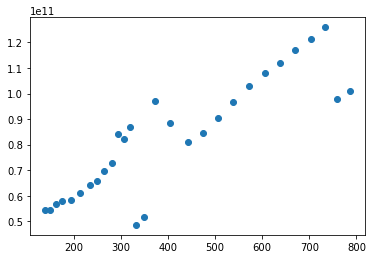

In [102]:
tuition_and_enrollment = totals_and_enrollment.join(average_tuition, on='year', rsuffix='_tuition')
plt.scatter(tuition_and_enrollment['average_tuition'], tuition_and_enrollment['faculty_spending'])

In [99]:
totals_and_enrollment.head()

,year,public,private,total,faculty_spending,per_capita
5,2015,14.57,5.42,19.99,1.009688e+11,5.050965e+09
6,2014,14.65,5.55,20.20,9.788758e+10,4.845920e+09
7,2013,14.75,5.63,20.38,1.259383e+11,6.179506e+09
8,2012,14.88,5.76,20.64,1.213165e+11,5.877738e+09
9,2011,15.12,5.89,21.01,1.169664e+11,5.567178e+09
